In [224]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [225]:
# import csv
csv_file_name = "/Users/emilydennis/Desktop/lightsheet_inprogress/humanvselastix.csv"

In [226]:
fulldf = pd.read_csv(csv_file_name)
fulldf.keys()

Index(['volume', 'point', 'annotator', 'z', 'x', 'y', 'brainid'], dtype='object')

In [227]:
fulldf

,volume,point,annotator,z,x,y,brainid
0,A,1,Adrian,57.0,141.0,222.0,k315_5
1,A,2,Adrian,339.0,111.0,221.0,k315_5
2,A,3,Adrian,408.0,111.0,221.0,k315_5
3,A,4,Adrian,440.0,126.0,222.0,k315_5
4,B,1,Adrian,98.0,151.0,312.0,k320_1
...,...,...,...,...,...,...,...
94,H,1,Chuck,13.0,73.0,131.0,schwarz
95,H,2,Chuck,71.0,57.0,133.0,schwarz
96,H,3,Chuck,111.0,60.0,133.0,schwarz
97,H,4,Chuck,122.0,79.0,133.0,schwarz


In [228]:
alldata = { } 

for name in np.unique(fulldf.annotator):
    alldata[name] = {}
    annotator = fulldf[fulldf.annotator==name]
    for volume in ["A","B","C","D","E","F","G","H"]:
        annotatorvol = annotator[annotator.volume==volume]
        alldata[name][volume]= {}
        for point in range(1,5):
            annotatorpt = annotatorvol[annotatorvol.point==point]
            alldata[name][volume][point] = [annotatorpt.x.tolist(),annotatorpt.y.tolist(),annotatorpt.z.tolist()]



In [229]:
# now that our data is easier to index, want to make different values for plotting
toplot = { } 

for name in np.unique(fulldf.annotator):
    toplot[name] = {}
    #want C vs G
    toplot[name]['humanvar'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['humanvar'][point] = val.item()
    toplot[name]['before'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['B'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['before'][point] = val.item()
    toplot[name]['affine'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['D'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['affine'][point] = val.item()
    toplot[name]['a1b'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['E'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['a1b'][point] = val.item()
    toplot[name]['final320'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final320'][point] = val.item()
    toplot[name]['final315'] = {}
    for point in range(1,5):
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        toplot[name]['final315'][point] = val.item()
        

In [232]:
# now that our data is easier to index, want to make different values for plotting
toplot = { } 
toplot['humanvar'] = {}
toplot['before'] = {}
toplot['affine'] = {}
toplot['a1b'] = {}
toplot['final320'] = {}
toplot['final320g'] = {}
toplot['final315'] = {}
toplot['k315k320'] = {}


for point in range(1,5):
    hv=[]
    b=[]
    a=[]
    a1b=[]
    k320=[]
    k320g=[]
    k315=[]
    k315k320=[]
    for name in np.unique(fulldf.annotator):
        print(name)
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        hv.append(val.item())
        vals=(abs(np.subtract(alldata[name]['B'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        b.append(val.item())
        vals=(abs(np.subtract(alldata[name]['D'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        a.append(val.item())
        vals=(abs(np.subtract(alldata[name]['E'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        a1b.append(val.item())
        vals=(abs(np.subtract(alldata[name]['C'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        k320.append(val.item())
        vals=(abs(np.subtract(alldata[name]['G'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        k320g.append(val.item())
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['F'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        k315.append(val.item())
        vals=(abs(np.subtract(alldata[name]['A'][point],alldata[name]['G'][point])))
        val = np.add(vals[0],vals[1],vals[2])
        k315k320.append(val.item())

    toplot['humanvar'][point] = hv
    toplot['before'][point] = b
    toplot['affine'][point] = a
    toplot['a1b'][point] = a1b
    toplot['final320'][point] = k320
    toplot['final320g'][point] = k320g
    toplot['final315'][point] = k315
    toplot['k315k320'][point] = k315k320
                      
toplot

Adrian
Chuck
Emily
Adrian
Chuck
Emily
Adrian
Chuck
Emily
Adrian
Chuck
Emily


{'humanvar': {1: [2.0, 1.0, 0.0],
  2: [2.0, 2.0, 7.0],
  3: [2.0, 1.0, 1.0],
  4: [3.0, 1.0, 7.0]},
 'before': {1: [151.0, 89.0, 92.0],
  2: [98.0, 101.0, 109.0],
  3: [97.0, 100.0, 110.0],
  4: [112.0, 132.0, 110.0]},
 'affine': {1: [46.0, 17.0, 19.0],
  2: [6.0, 1.0, 15.0],
  3: [6.0, 1.0, 10.0],
  4: [3.0, 73.0, 13.0]},
 'a1b': {1: [52.0, 10.0, 8.0],
  2: [6.0, 5.0, 13.0],
  3: [6.0, 5.0, 3.0],
  4: [8.0, 69.0, 1.0]},
 'final320': {1: [56.0, 4.0, 0.0],
  2: [4.0, 9.0, 16.0],
  3: [4.0, 9.0, 3.0],
  4: [7.0, 67.0, 5.0]},
 'final320g': {1: [56.0, 5.0, 0.0],
  2: [2.0, 9.0, 9.0],
  3: [2.0, 8.0, 2.0],
  4: [4.0, 68.0, 2.0]},
 'final315': {1: [51.0, 11.0, 10.0],
  2: [19.0, 5.0, 8.0],
  3: [19.0, 5.0, 4.0],
  4: [25.0, 66.0, 1.0]},
 'k315k320': {1: [5.0, 8.0, 10.0],
  2: [17.0, 4.0, 3.0],
  3: [17.0, 3.0, 4.0],
  4: [21.0, 2.0, 3.0]}}

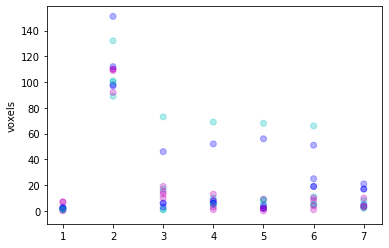

In [243]:
plt.scatter([1,1,1],toplot['humanvar'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([1,1,1],toplot['humanvar'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([1,1,1],toplot['humanvar'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([1,1,1],toplot['humanvar'][4],c=['b','c','m'],alpha=0.3)


plt.scatter([2,2,2],toplot['before'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([2,2,2],toplot['before'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([2,2,2],toplot['before'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([2,2,2],toplot['before'][4],c=['b','c','m'],alpha=0.3)

plt.scatter([3,3,3],toplot['affine'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([3,3,3],toplot['affine'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([3,3,3],toplot['affine'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([3,3,3],toplot['affine'][4],c=['b','c','m'],alpha=0.3)

plt.scatter([4,4,4],toplot['a1b'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([4,4,4],toplot['a1b'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([4,4,4],toplot['a1b'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([4,4,4],toplot['a1b'][4],c=['b','c','m'],alpha=0.3)

plt.scatter([5,5,5],toplot['final320g'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([5,5,5],toplot['final320g'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([5,5,5],toplot['final320g'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([5,5,5],toplot['final320g'][4],c=['b','c','m'],alpha=0.3)

plt.scatter([6,6,6],toplot['final315'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([6,6,6],toplot['final315'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([6,6,6],toplot['final315'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([6,6,6],toplot['final315'][4],c=['b','c','m'],alpha=0.3)

plt.scatter([7,7,7],toplot['k315k320'][1],c=['b','c','m'],alpha=0.3)
plt.scatter([7,7,7],toplot['k315k320'][2],c=['b','c','m'],alpha=0.3)
plt.scatter([7,7,7],toplot['k315k320'][3],c=['b','c','m'],alpha=0.3)
plt.scatter([7,7,7],toplot['k315k320'][4],c=['b','c','m'],alpha=0.3)
plt.ylabel('voxels')
plt.show()


dict_values([{'humanvar': {1: 2, 2: 2, 3: 2, 4: 3}, 'before': {1: 151, 2: 98, 3: 97, 4: 112}, 'affine': {1: 46, 2: 6, 3: 6, 4: 3}, 'a1b': {1: 52, 2: 6, 3: 6, 4: 8}, 'final320': {1: 56, 2: 4, 3: 4, 4: 7}, 'final315': {1: 51, 2: 19, 3: 19, 4: 25}}, {'humanvar': {1: 0, 2: 7, 3: 1, 4: 7}, 'before': {1: 92, 2: 109, 3: 110, 4: 110}, 'affine': {1: 19, 2: 15, 3: 10, 4: 13}, 'a1b': {1: 8, 2: 13, 3: 3, 4: 1}, 'final320': {1: 0, 2: 16, 3: 3, 4: 5}, 'final315': {1: 10, 2: 8, 3: 4, 4: 1}}])

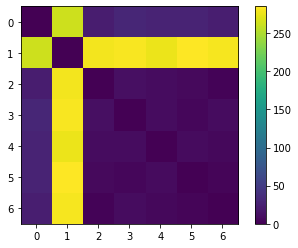

In [8]:
plt.imshow(pt4mat)
plt.colorbar()

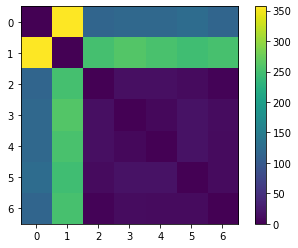

In [50]:
plt.imshow(pt3mat)
plt.colorbar()

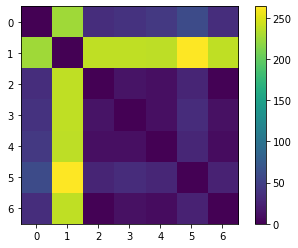

In [51]:
plt.imshow(pt2mat)
plt.colorbar()

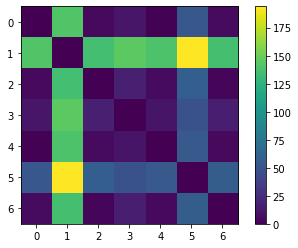

In [52]:
plt.imshow(pt1mat)
plt.colorbar()

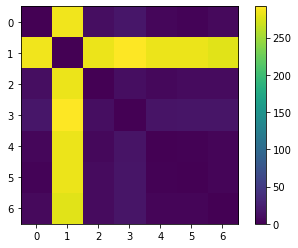

In [57]:
plt.imshow(pt4mat)
plt.colorbar()

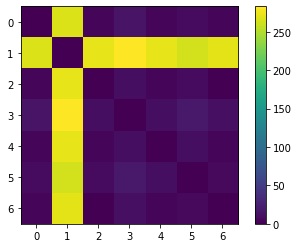

In [58]:
plt.imshow(pt3mat)
plt.colorbar()

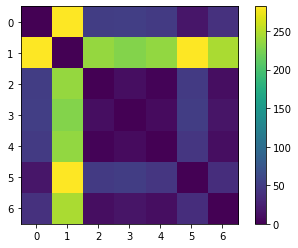

In [59]:
plt.imshow(pt2mat)
plt.colorbar()

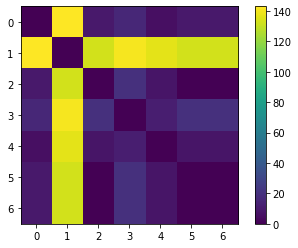

In [60]:
plt.imshow(pt1mat)
plt.colorbar()


In [63]:
pt1mat


array([[  0., 143.,  10.,  16.,   6.,  10.,  10.],
       [143.,   0., 133., 141., 137., 133., 133.],
       [ 10., 133.,   0.,  20.,   8.,   0.,   0.],
       [ 16., 141.,  20.,   0.,  12.,  20.,  20.],
       [  6., 137.,   8.,  12.,   0.,   8.,   8.],
       [ 10., 133.,   0.,  20.,   8.,   0.,   0.],
       [ 10., 133.,   0.,  20.,   8.,   0.,   0.]])

the plots I want will have

x: human variability within brains:
for each of the 4 points for each person, k320_5 vs k320_52
plot each person's points in a color

x: before reigstration
for each of the 4 points for each person, k320_1 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_1

x: affine only
for each of the 4 points for each person, k320_2 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_2

x: affine+1 bspline
for each of the 4 points for each person, k320_3 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_3

x: affine+2 bspline
for each of the 4 points for each person, k320_4 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_4

x: fully registered
for each of the 4 points for each person, k320_5 vs whs
plot each person's points in a color
ADD for the inverse registration, dist predicted by warping from whs to k320_5 (this should be zero)

x: human variability across brains:
for each of the 4 points for each person, k315_5 vs whs

so I want a data structure where I have a dict with indices of ['humanvar','beforereg','affine','affine1b','affine2b','affine3b','full','k315]

nested dicts
mydata = {1: {'name': 'Adrian', 'pt1':[],'pt2':[],'pt3':[],'pt4':[]},
          2: {'name': 'Emily', 'pt1':[],'pt2':[],'pt3':[],'pt4':[]}}

humanvar = C vs G   (2,6)
before = B vs F     (1,5)
affine = D vs F     (3,5)
affine1b = E vs F   (4,5)
final320 = C vs F   (2,5)
final315 = A vs F   (0,5)

0 1 2 3 4 5 6 7
a b c d e f g h

def findvalue(index):

nested dicts {1: {'xlab': 'humanvar', 'A':[Apt1[2,6],Apt2[2,6],Apt3[2,6],Apt4[2,6],'E':[Ept1[2,6],Ept2[2,6],Ept3[2,6],Ept4[2,6]},
          2: {'xlab': 'beforereg', 'A':[],'E':[]}}